##Importando Librerias 

In [79]:
import pandas as pd
import sqlite3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler #escalar los datos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report # se uso para evaluar la matris de confusion y obtener el f1-score

In [ ]:
#Creacion de las tablas como data frames

In [2]:
database = "../data/raw/database.sqlite"
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

conn.close()
tables



conn = sqlite3.connect(database)


dict_tables_db = {}
lista_no_tablas = ['sqlite_sequence']
for tabletmp in tables.name:
    if tabletmp not in lista_no_tablas:
        query = "SELECT * from %s"%tabletmp
        print(query)
        dict_tables_db[tabletmp] = pd.read_sql_query(query, conn)


conn.close()


[display(x) for x in dict_tables_db.values()]

SELECT * from Player_Attributes
SELECT * from Player
SELECT * from Match
SELECT * from League
SELECT * from Country
SELECT * from Team
SELECT * from Team_Attributes


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


[None, None, None, None, None, None, None]

In [ ]:
# Iterando sobre el diccionario que contiene las tablas 

In [3]:
for key,tabletbp in dict_tables_db.items():
    print(key)

Player_Attributes
Player
Match
League
Country
Team
Team_Attributes


In [ ]:
#Resuemn de lo que contiene cada tabla 

In [4]:
for key,tabletbp in dict_tables_db.items():
    print(key)
    print(tabletbp.shape)
    display(tabletbp.describe())

Player_Attributes
(183978, 42)


,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


Player
(11060, 7)


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


Match
(25979, 115)


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


League
(11, 3)


,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


Country
(11, 2)


,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


Team
(299, 5)


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


Team_Attributes
(1458, 25)


,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [ ]:
#este si es el df para cada tabla

In [5]:
df_player_atr = dict_tables_db['Player_Attributes']
df_player = dict_tables_db['Player']
#df_match = dict_tables_db['Match']
#df_league = dict_tables_db['League']
#df_country = dict_tables_db['Country']
#df_team = dict_tables_db['Team']
#df_team_atr = dict_tables_db['Team_Attributes']

In [6]:
#en estas llaves se unen las tablas objetivo
[x for x in df_player_atr.columns if x in df_player.columns]

['id', 'player_fifa_api_id', 'player_api_id']

In [7]:
df_team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [ ]:
#Join de las tablas df_player_atr y df_player

In [8]:
df_player_atr['penalties']

0         48.0
1         48.0
2         48.0
3         47.0
4         47.0
          ... 
183973    83.0
183974    70.0
183975    70.0
183976    53.0
183977    53.0
Name: penalties, Length: 183978, dtype: float64

In [9]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
#las llaves son player_api_id y player_fifa_api_id (se llaman igual en ambas tablas


df_players = df_player_atr[['player_fifa_api_id', 'player_api_id', 'date', 'overall_rating','potential', 'preferred_foot', 'attacking_work_rate','defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy','short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy','long_passing', 'ball_control', 'acceleration', 'sprint_speed','agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina','strength', 'long_shots', 'aggression', 'interceptions', 'positioning','vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']].merge(
    df_player[['player_fifa_api_id','player_api_id','height','weight']],
    how='left',left_on='player_fifa_api_id', right_on = 'player_fifa_api_id'
)




In [11]:

#distintos valores en cada columna
valores_unicos = {col: df_players[col].unique() for col in df_players.columns}
valores_unicos


{'player_fifa_api_id': array([218353, 189615, 186170, ..., 111191,  47058, 102359]),
 'player_api_id_x': array([505942, 155782, 162549, ...,  36491,  35506,  39902]),
 'date': array(['2016-02-18 00:00:00', '2015-11-19 00:00:00',
        '2015-09-21 00:00:00', '2015-03-20 00:00:00',
        '2007-02-22 00:00:00', '2016-04-21 00:00:00',
        '2016-04-07 00:00:00', '2016-01-07 00:00:00',
        '2015-12-24 00:00:00', '2015-12-17 00:00:00',
        '2015-10-16 00:00:00', '2015-09-25 00:00:00',
        '2015-01-09 00:00:00', '2014-12-05 00:00:00',
        '2014-11-07 00:00:00', '2014-09-18 00:00:00',
        '2014-05-02 00:00:00', '2014-04-04 00:00:00',
        '2014-03-14 00:00:00', '2013-12-13 00:00:00',
        '2013-11-08 00:00:00', '2013-10-04 00:00:00',
        '2013-09-20 00:00:00', '2013-05-03 00:00:00',
        '2013-03-22 00:00:00', '2013-03-15 00:00:00',
        '2013-02-22 00:00:00', '2013-02-15 00:00:00',
        '2012-08-31 00:00:00', '2012-02-22 00:00:00',
        '2011-0

In [12]:
#group by para ver valores distintos en las col attacking y defensive

df_players['attacking_work_rate'].value_counts()

#proporcion = (89+104+106+348)/(3639+8569+42823+125070)
#proporcion = 0.003592428692789046

attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: count, dtype: int64

In [13]:
df_players[df_players['overall_rating'].isna()]

,player_fifa_api_id,player_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_api_id_y,height,weight
483,33022,31684,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31684.0,190.50,181.0
983,111085,29904,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29904.0,182.88,165.0
1752,165740,24159,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24159.0,175.26,139.0
2089,176941,31916,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31916.0,177.80,172.0
2482,177615,37249,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37249.0,182.88,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182587,116368,25538,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.0,182.88,172.0
183249,139865,32633,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32633.0,187.96,181.0
183309,141272,33823,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33823.0,175.26,159.0
183361,168650,25772,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25772.0,185.42,176.0


In [14]:
df_players_clean = df_players.dropna(subset=['overall_rating'])
df_players_clean

,player_fifa_api_id,player_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_api_id_y,height,weight
0,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0
1,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0
2,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0
3,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,505942.0,182.88,187.0
4,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,505942.0,182.88,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,...,31.0,30.0,9.0,20.0,84.0,20.0,20.0,39902.0,180.34,176.0
183974,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0
183975,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,...,31.0,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0
183976,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,...,32.0,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0


In [15]:
df_players_clean = df_players[df_players['attacking_work_rate'].isin(['medium', 'high', 'low', 'None'])]
df_players_clean['attacking_work_rate'].value_counts()

attacking_work_rate
medium    125070
high       42823
low         8569
None        3639
Name: count, dtype: int64

In [16]:
df_players_clean = df_players[df_players['defensive_work_rate'].isin(['medium', 'high', 'low', 'o'])]
df_players_clean['defensive_work_rate'].value_counts()

defensive_work_rate
medium    130846
high       27041
low        18432
o           1550
Name: count, dtype: int64

In [17]:
#distintos valores en cada columna
#valores_unicos = {col: df_players_clean[col].unique() for col in df_players_clean.columns}
#valores_unicos

df_players_clean.dtypes

player_fifa_api_id       int64
player_api_id_x          int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penaltie

<Axes: >

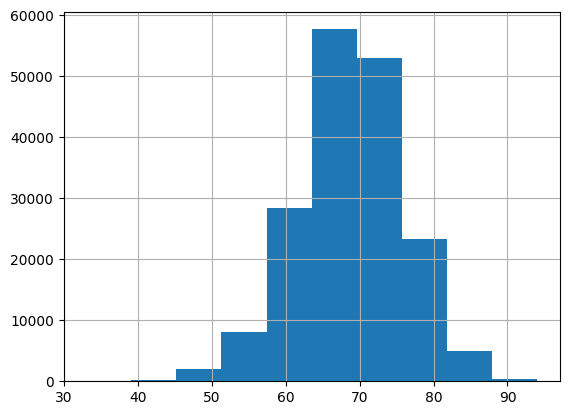

In [18]:
df_players_clean['overall_rating'].hist()

In [19]:
df_players['overall_rating'].median()

69.0

In [ ]:
#Cambios de variables categoricas a valores numericos

In [36]:
dict_categorias_preferred_foot = {
    'right':1,
    'left':0
}


dict_categorias_attacking_work_rate = {
    'high':2,
    'low':-1,
    'medium':1,
     'None' : 0
}


dict_categorias_defensive_work_rate = {
    'high':2,
    'medium':1,
    'o':0,
    'low':-1
}

In [24]:
df_players_clean.loc[:,'preferred_foot'] = df_players_clean.preferred_foot.replace(dict_categorias_preferred_foot)
df_players_clean['preferred_foot'].value_counts()

preferred_foot
1    134401
0     43468
Name: count, dtype: int64

In [37]:
df_players_clean.loc[:,'attacking_work_rate'] = df_players_clean.attacking_work_rate.replace(dict_categorias_attacking_work_rate)

df_players_clean['attacking_work_rate'].value_counts()


attacking_work_rate
1     124871
2      42751
-1      8539
0       1708
Name: count, dtype: int64

In [26]:
df_players_clean.loc[:,'defensive_work_rate'] = df_players_clean.defensive_work_rate.replace(dict_categorias_defensive_work_rate)
df_players_clean['defensive_work_rate'].value_counts()

defensive_work_rate
1     130846
2      27041
-1     18432
0       1550
Name: count, dtype: int64

In [ ]:
#Creacion de la variable target

In [27]:
df_players_clean.loc[:, 'target_variable'] = df_players_clean['overall_rating'].apply(lambda x: 1 if x >= 70 else 0)
df_players_clean

/tmp/ipykernel_1148/3670092226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_clean.loc[:, 'target_variable'] = df_players_clean['overall_rating'].apply(lambda x: 1 if x >= 70 else 0)


,player_fifa_api_id,player_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_api_id_y,height,weight,target_variable
0,218353,505942,2016-02-18 00:00:00,67.0,71.0,1,1,1,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0,0
1,218353,505942,2015-11-19 00:00:00,67.0,71.0,1,1,1,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0,0
2,218353,505942,2015-09-21 00:00:00,62.0,66.0,1,1,1,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,505942.0,182.88,187.0,0
3,218353,505942,2015-03-20 00:00:00,61.0,65.0,1,1,1,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,505942.0,182.88,187.0,0
4,218353,505942,2007-02-22 00:00:00,61.0,65.0,1,1,1,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,505942.0,182.88,187.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,2009-08-30 00:00:00,83.0,85.0,1,1,-1,84.0,77.0,...,30.0,9.0,20.0,84.0,20.0,20.0,39902.0,180.34,176.0,1
183974,102359,39902,2009-02-22 00:00:00,78.0,80.0,1,1,-1,74.0,76.0,...,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0,1
183975,102359,39902,2008-08-30 00:00:00,77.0,80.0,1,1,-1,74.0,71.0,...,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0,1
183976,102359,39902,2007-08-30 00:00:00,78.0,81.0,1,1,-1,74.0,64.0,...,30.0,9.0,20.0,73.0,20.0,20.0,39902.0,180.34,176.0,1


In [ ]:
#verificando que no hayan nan 

In [47]:
columnas_a_verificar = [
    'player_fifa_api_id', 'potential', 'preferred_foot', 'attacking_work_rate',
    'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
    'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
    'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
    'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
    'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
    'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
    'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
    'gk_reflexes', 'height', 'weight'
]

columnas_con_nan = df_players_clean[columnas_a_verificar].isnull().any()

columnas_con_nan[columnas_con_nan == True]


volleys           True
curve             True
agility           True
balance           True
jumping           True
vision            True
sliding_tackle    True
dtype: bool

In [57]:
df_players_clean['volleys'].value_counts()
df_players_clean['curve'].value_counts()
df_players_clean['agility'].value_counts()
df_players_clean['balance'].value_counts()
df_players_clean['jumping'].value_counts()
df_players_clean['vision'].value_counts()
df_players_clean['sliding_tackle'].value_counts()

sliding_tackle
3.0         3
93.0        5
95.0       11
90.0       22
4.0        23
        ...  
67.0     4358
66.0     4379
65.0     4470
68.0     4584
25.0    13209
Name: count, Length: 94, dtype: int64

In [61]:
#cambiar los nan de las columnas por 0
df_players_clean.loc[:, ['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'sliding_tackle']] = df_players_clean.loc[:, ['volleys', 'curve', 'agility', 'balance', 'jumping', 'vision', 'sliding_tackle']].fillna(0)
#verificar de nuevo nan
columnas_con_nan = df_players_clean[columnas_a_verificar].isnull().any()

columnas_con_nan[columnas_con_nan == True]


Series([], dtype: bool)

In [86]:
#Split de los datos, para no generar likecht eliminamos overall_rating de la estamos usando para crear la variable target


feature_cols = ['player_fifa_api_id',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes','height',
       'weight']
X = df_players_clean[feature_cols] # Features
y = df_players_clean.target_variable # Target variable

In [87]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [88]:
#escalar los datos

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [89]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
logreg


LogisticRegression(random_state=16)

In [91]:
# fit the model with data
#logreg.fit(X_train, y_train)
logreg.fit(X_train_scaled, y_train)
#y_pred = logreg.predict(X_test)

LogisticRegression(random_state=16)

In [92]:
#evaluar el modelo con una matriz de confución
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16556,  2733],
       [ 2705, 13580]])

Text(0.5, 427.9555555555555, 'Predicted label')

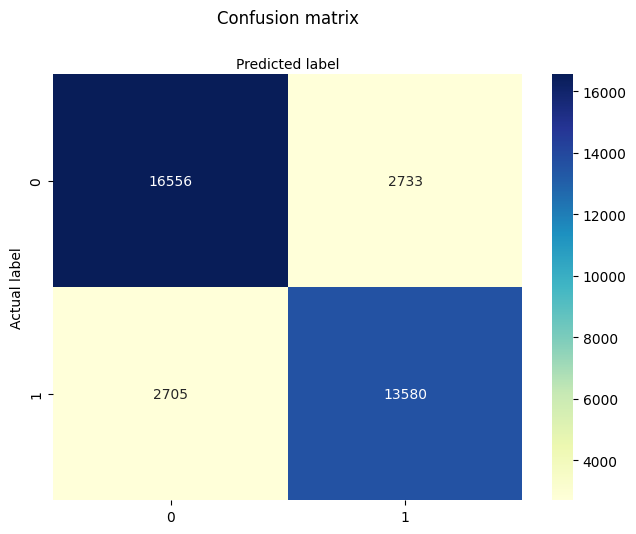

In [94]:
#ver la matriz en un mapa de calor

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [95]:
#evaluacion numrica de la matriz de confusion
target_names = ['Score Sobresaliente', 'Score no sobresaliente']
print(classification_report(y_test, y_pred, target_names=target_names))

                        precision    recall  f1-score   support

   Score Sobresaliente       0.86      0.86      0.86     19289
Score no sobresaliente       0.83      0.83      0.83     16285

              accuracy                           0.85     35574
             macro avg       0.85      0.85      0.85     35574
          weighted avg       0.85      0.85      0.85     35574



In [ ]:
#Curva ROC

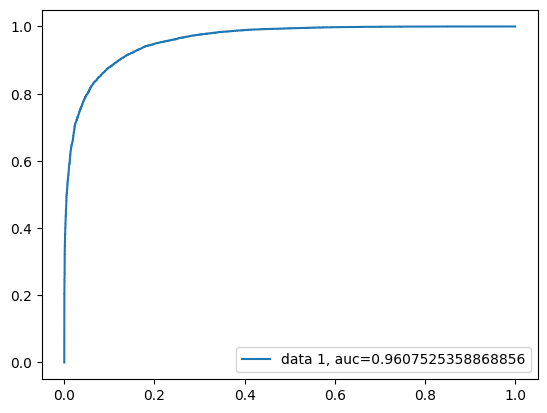

In [96]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()